# **S&P 500 Predictor Analysis**

Dieses Projekt zielt darauf ab, mithilfe von **Machine Learning (ML)** und **technischen Indikatoren** Kauf-, Verkaufs- oder Haltesignale für den **S&P 500 Index** vorherzusagen. Es nutzt historische Kursdaten, um Trends und Muster zu analysieren und daraus Handlungsempfehlungen abzuleiten.


In [99]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

<Axes: xlabel='Date'>

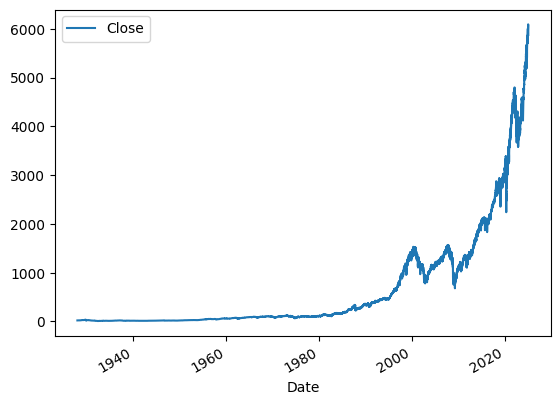

In [100]:
sp500.plot.line(y="Close", use_index=True)

In [101]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [102]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-12-12 00:00:00-05:00,6074.290039,6079.680176,6051.250000,6051.250000,3678010000,6051.089844,0
2024-12-13 00:00:00-05:00,6068.169922,6078.580078,6035.770020,6051.089844,3584960000,6074.080078,1
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,6050.609863,0


In [103]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-12-12 00:00:00-05:00,6074.290039,6079.680176,6051.250000,6051.250000,3678010000,6051.089844,0
2024-12-13 00:00:00-05:00,6068.169922,6078.580078,6035.770020,6051.089844,3584960000,6074.080078,1
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,6050.609863,0


In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [105]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [106]:
precision_score(test["Target"], preds)

0.639344262295082

<Axes: xlabel='Date'>

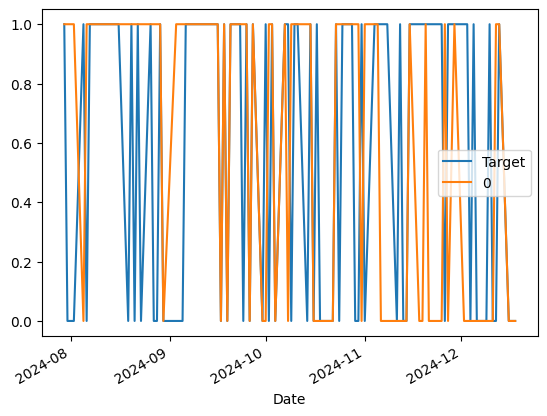

In [107]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [108]:
def predict(train_pred, test_pred, predictors_pred, model_pred):
    model_pred.fit(train_pred[predictors_pred], train_pred["Target"])
    preds1 = model_pred.predict(test_pred[predictors_pred])
    preds1 = pd.Series(preds1, index=test_pred.index, name="Predictions")
    combined1 = pd.concat([test_pred["Target"], preds1], axis=1)
    return combined1

In [109]:
def backtest(data, model_back, predictors_back, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train1 = data.iloc[0:i].copy()
        test1 = data.iloc[i:(i+step)].copy()
        predictions1 = predict(train1, test1, predictors_back, model_back)
        all_predictions.append(predictions1)
    return pd.concat(all_predictions)

In [110]:
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts()

Predictions
0    3681
1    2628
Name: count, dtype: int64

In [111]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5289193302891934

In [112]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.53606
0    0.46394
Name: count, dtype: float64

In [113]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio{horizon}"
    sp500.loc[:, ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500.loc[:, trend_column] = sp500["Target"].shift(1).rolling(horizon).sum()
    
    new_predictors += [ratio_column, trend_column]

sp500 = sp500.dropna()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 00:00:00-05:00,6060.149902,6092.589844,6060.149902,6084.189941,4269950000,6051.250000,0,1.004066,1.0,1.002756,2.0,1.037677,36.0,1.133027,147.0,1.353099,532.0
2024-12-12 00:00:00-05:00,6074.290039,6079.680176,6051.250000,6051.250000,3678010000,6051.089844,0,0.997286,1.0,0.998112,2.0,1.030790,36.0,1.125776,146.0,1.345068,532.0
2024-12-13 00:00:00-05:00,6068.169922,6078.580078,6035.770020,6051.089844,3584960000,6074.080078,1,0.999987,0.0,0.999378,1.0,1.029776,35.0,1.124631,146.0,1.344326,532.0


In [114]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [115]:
def predict_improved(train_pred, test_pred, predictors_pred, model_pred):
    model_pred.fit(train_pred[predictors_pred], train_pred["Target"])
    preds1 = model_pred.predict_proba(test_pred[predictors_pred])[:,1]
    preds1[preds1 >= .6] = 1
    preds1[preds1 < .6] = 0
    preds1 = pd.Series(preds1, index=test_pred.index, name="Predictions")
    combined1 = pd.concat([test_pred["Target"], preds1], axis=1)
    return combined1

In [116]:
predictions = backtest(sp500, model, new_predictors)

In [117]:
predictions["Predictions"].value_counts()

Predictions
1    3735
0    1573
Name: count, dtype: int64

In [118]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5542168674698795